In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
SEED = 42

In [64]:
data_link = "https://raw.githubusercontent.com/20161609/data_box/c8bbf4888f31bc53672161471eed3855fb76744a/titanic.csv"
df = pd.read_csv(data_link)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Replace ' ' -> '_'
df.columns = df.columns.str.replace(' ', '_')
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [66]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [67]:
df['Survived'].value_counts()

,count
Survived,
0,424
1,290


<Axes: xlabel='Survived', ylabel='count'>

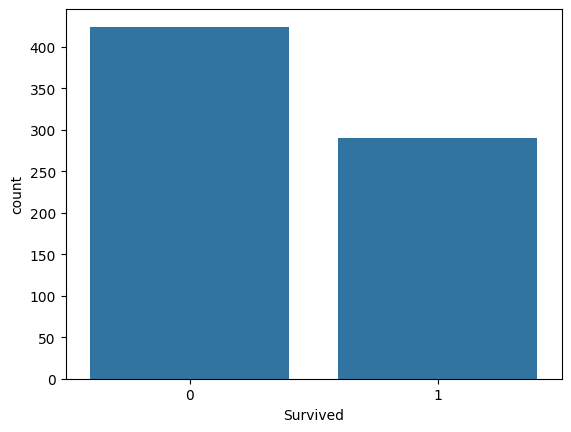

In [68]:
sns.countplot(data=df, x='Survived')

In [69]:
# Sum of rows which even 1 col's value is None
df.isnull().sum(axis=1).sum()

0

In [70]:
df.duplicated().sum()

375

<Axes: >

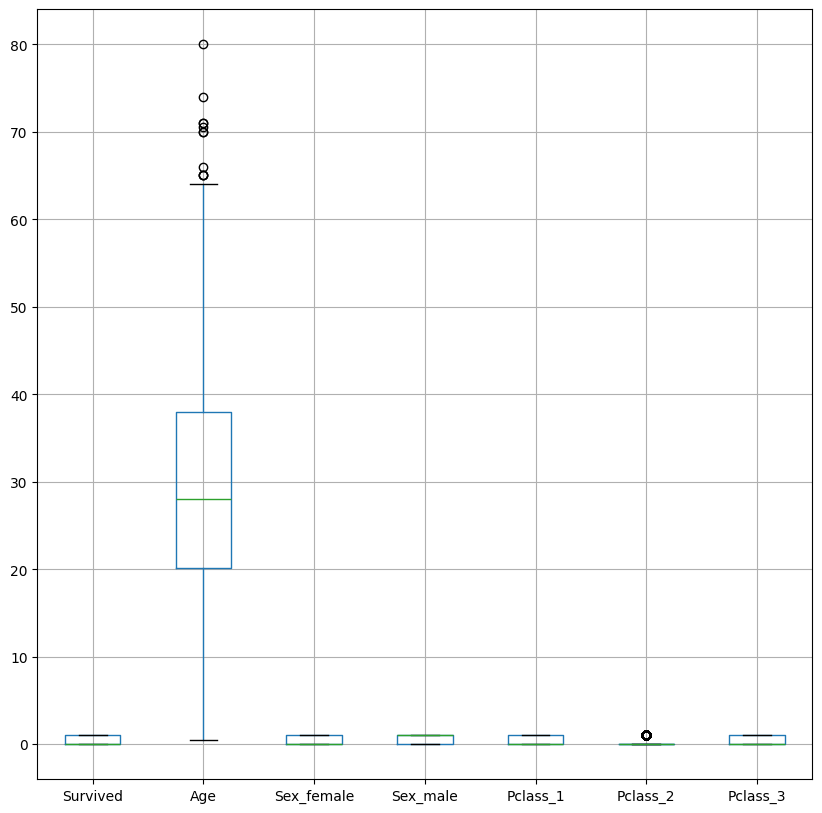

In [71]:
# Draw boxplot
df.boxplot(figsize=(10,10))

In [72]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0,1.0,1.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


In [73]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [74]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=0)
model.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [75]:
model.score(x_test, y_test)

0.5944055944055944

In [59]:
from sklearn.model_selection import GridSearchCV

model = SVC(probability=True, random_state=0)

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model 75 times with 75 different parameter combinations

best_model = grid_search.best_estimator_ # Get the model with the best performance

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, k

In [60]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [61]:
scores = cross_validate(best_model, x, y, cv=5)
print(scores['test_score'].mean())

0.8179552841524671
